<a href="https://colab.research.google.com/github/vishnu-nitc/NLP-Chatbot/blob/main/Group_3_NLP_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
#import libraries 
import numpy as np
import pandas as pd
import re 
import nltk 
import keras
import tensorflow as tf
from tensorflow import keras

import random
import json
import pickle
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

nltk.download('stopwords',quiet=True) # stopword library
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AC49183\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
df=pd.read_csv('/content/drive/My Drive/AIML/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [125]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [126]:
#check if any column have missing value
def missing_val_cnt(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value found.')

In [127]:
# Missing values
missing_val_cnt(df)

There is no missing value found.


In [128]:
df.drop_duplicates(inplace=True)

In [129]:
#Dropping the first column 'Unnamed'
df.drop(columns=df.columns[0],axis=1,inplace=True)

In [130]:
#Rename column with meaningful label
df.rename(columns = {'Data':'Date & Timestamp'}, inplace = True)

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


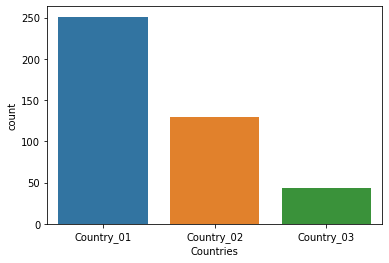

In [131]:
#EDA- Visualisation and preprocessing of each variable
sns.countplot(df['Countries']);

In [132]:
df['Countries'].replace(['Country_01', 'Country_02', 'Country_03'],[1,2,3], inplace=True)
df['Countries']=df['Countries'].astype(int)

In [133]:
df['Local']=df['Local'].str[6:]
df['Local']=df['Local'].astype(int)

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


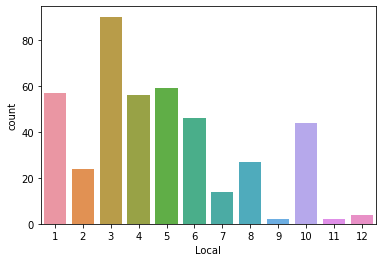

In [134]:
sns.countplot(df['Local']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


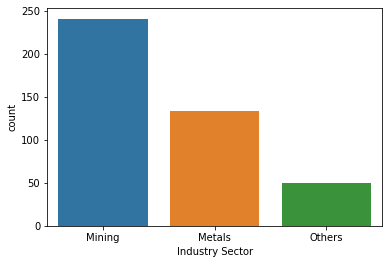

In [135]:
sns.countplot(df['Industry Sector']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


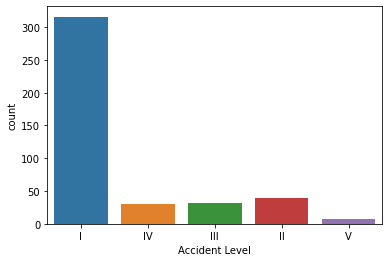

In [136]:
sns.countplot(df['Accident Level']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


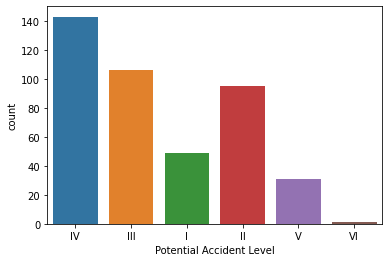

In [137]:
sns.countplot(df['Potential Accident Level']);

In [138]:
df['Accident Level']=df['Accident Level'].replace(['I','II','III','IV','V'],[1,2,3,4,5])
df['Accident Level']=df['Accident Level'].astype(int)

In [139]:
df['Potential Accident Level']=df['Potential Accident Level'].replace(['I','II','III','IV','V','VI'],[1,2,3,4,5,6])
df['Potential Accident Level']=df['Potential Accident Level'].astype(int)

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


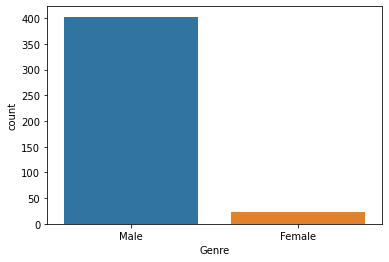

In [140]:
sns.countplot(df['Genre']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


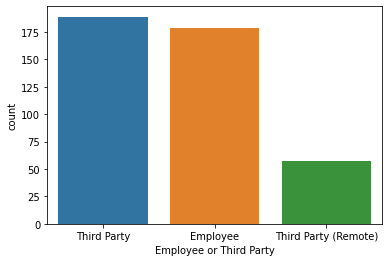

In [141]:
sns.countplot(df['Employee or Third Party']);

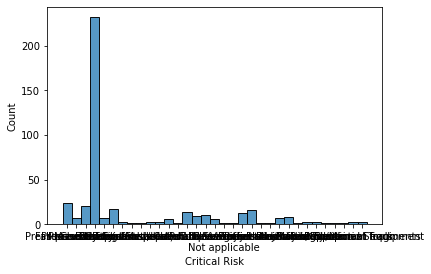

In [142]:
sns.histplot(df['Critical Risk']);

In [143]:
df['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
remains of choco                               7
Pressurized Systems                            7
Fall prevention (same level)                   7
Suspended Loads                                6
Fall prevention                                6
Power lock                                     3
Pressurized Systems / Chemical Substances      3
Blocking and isolation of energies             3
Liquid Metal                                   3
Electrical Shock                               2
Machine Protection  

In [144]:
df['Critical Risk'].nunique()

33

In [145]:
df['Date'] = pd.to_datetime(df['Date & Timestamp'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Weekday'] = df.Date.apply(lambda x : x.day_name())
df['WeekofYear'] = df.Date.apply(lambda x : x.weekofyear)

In [146]:
#Defining seasons for months in Brazil
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [147]:
df['Season'] = df['Month'].apply(month2seasons)

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


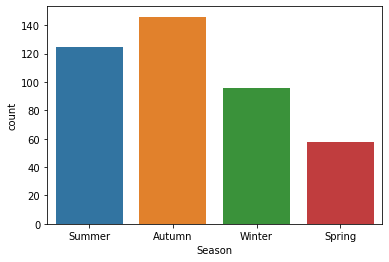

In [148]:
sns.countplot(df['Season']);

In [149]:
le=LabelEncoder()
df['Season']=le.fit_transform(df['Season'])

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


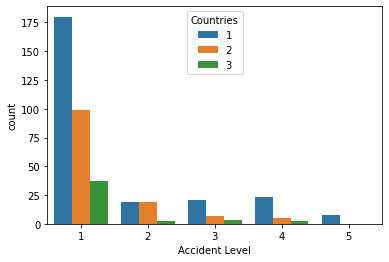

In [150]:
#Bivariate analysis
sns.countplot(df['Accident Level'],hue=df['Countries']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


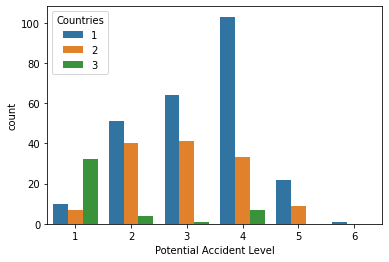

In [151]:
sns.countplot(df['Potential Accident Level'],hue=df['Countries']);


C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


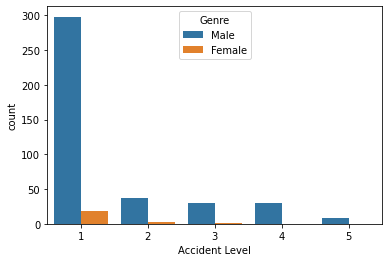

In [152]:
sns.countplot(df['Accident Level'],hue=df['Genre']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


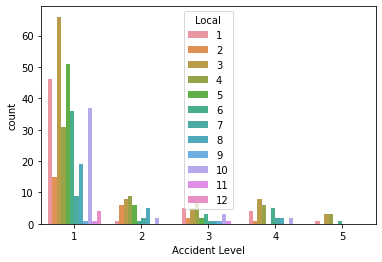

In [153]:
sns.countplot(df['Accident Level'],hue=df['Local']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


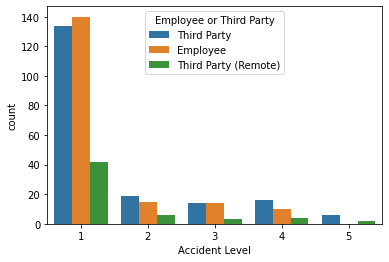

In [154]:
sns.countplot(df['Accident Level'],hue=df['Employee or Third Party']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


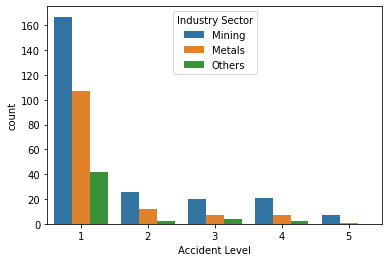

In [155]:
sns.countplot(df['Accident Level'],hue=df['Industry Sector']);

C:\Users\AC49183\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


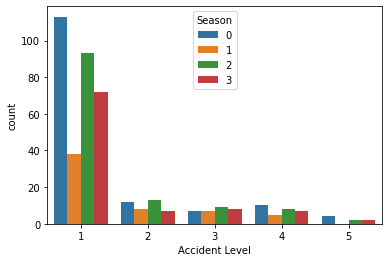

In [156]:
sns.countplot(df['Accident Level'],hue=df['Season']);

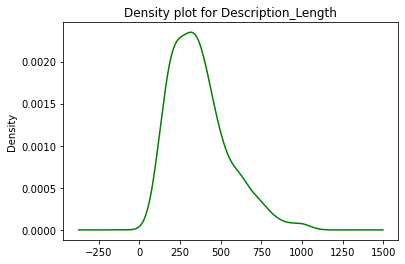

In [157]:
#Analysing Description variable
df['Description_Length']=df['Description'].str.len()
df.Description_Length.plot.density(color='green')
plt.title('Density plot for Description_Length')
plt.show()

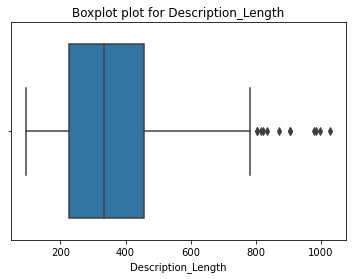

In [158]:
sns.boxplot(x=df["Description_Length"])
plt.title('Boxplot plot for Description_Length')
plt.show()

In [159]:
print('Average length of Description : ',df.Description.str.len().mean())
print('Maximum length of Description : ',df.Description.str.len().max())
print('Minimum length of Description : ',df.Description.str.len().min())

Average length of Description :  368.28
Maximum length of Description :  1029
Minimum length of Description :  94


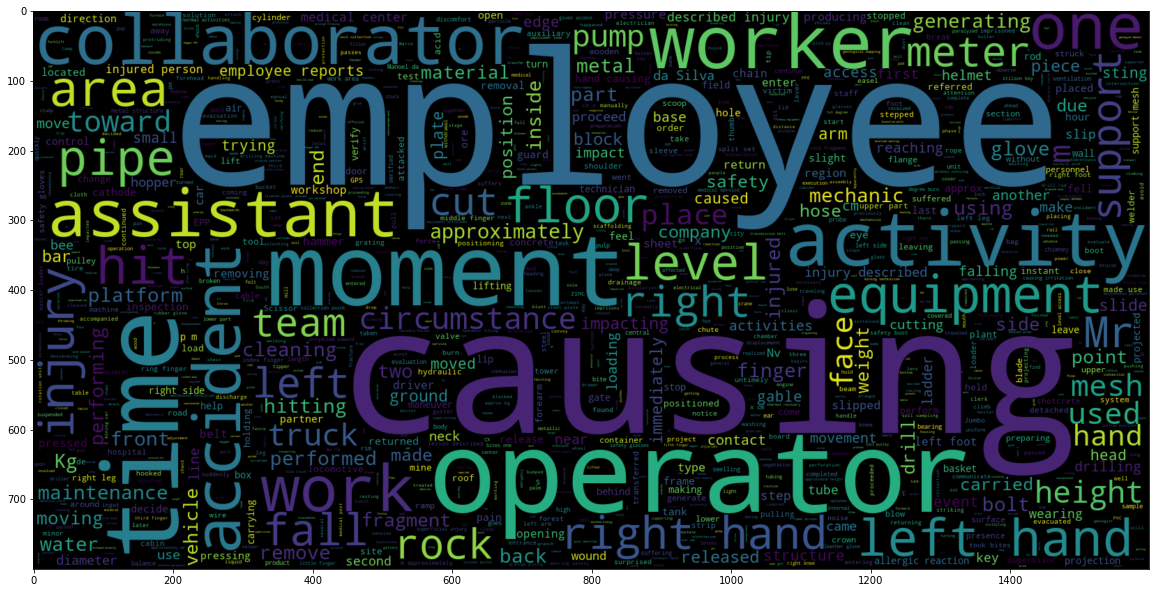

In [160]:
#plotting the most frequent words with wordcloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Description'].values))
plt.imshow(wc , interpolation = 'bilinear')

In [161]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(df['Description']))
len(tokenizer.word_counts)

3453

only 3453 words . including stop words


In [162]:
#Analysing the frequent words
word_count_array = tokenizer.word_counts
word=[]
counts=[]
for key,val in word_count_array.items():
  word.append(key)
  counts.append(val)
df_cnt=pd.DataFrame(list(zip(word,counts)),columns=['word','count'])
df_cnt.nlargest(40,['count'])

,word,count
2,the,4355
5,of,1517
12,to,672
32,and,612
57,in,556
47,a,532
52,was,439
35,at,350
25,on,307
132,that,294


In [163]:
#Preprocessing with NLP
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', ' ', str(text))

def lower_case(text):
    return text.lower()    

def remove_tags(text):    
    return re.sub("</?.*?>"," <> ", text)

def remove_special_chars_and_digits(text):
    return re.sub("(\\d|\\W)+"," ", text)

def stopword_lemma(text):
    token = nltk.word_tokenize(text)
    text_stop = [x for x in token if x not in set(stopwords.words('english'))]
    lemmatizer = WordNetLemmatizer()
    text_lemma = [lemmatizer.lemmatize(word) for word in text_stop]
    text_lemma = ' '.join(text_lemma)
    return text_lemma


def normalize_text(text: str) -> str:
    text = remove_punctuation(text)
    text = lower_case(text)
    text = remove_tags(text)
    text = remove_special_chars_and_digits(text)
    text = stopword_lemma(text)
    
    return text

In [164]:
df['normalized_Description'] = df['Description'].apply(normalize_text)

In [165]:
#Encoding other categorical variables
df['Employee or Third Party']=le.fit_transform(df['Employee or Third Party'])
df['Critical Risk']=le.fit_transform(df['Critical Risk'])
df['Genre']=le.fit_transform(df['Genre'])
df['Industry Sector']=le.fit_transform(df['Industry Sector'])

In [166]:
#Creating glove embeddings
embeddings_index = {}
EMBEDDING_FILE = '/content/drive/My Drive/AIML/glove.6B.300d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

1416it [00:00, 9790.78it/s]


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 6148: character maps to <undefined>

In [167]:
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [168]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
ind_glove_df=pd.DataFrame()
ind_glove_df = [sent2vec(x) for x in tqdm(df['normalized_Description'])]

100%|██████████████████████████████████████████████████████████████████████████████| 425/425 [00:00<00:00, 2204.91it/s]


In [169]:
ind_glove_df

[array([-2.18877327e-02,  1.78820640e-02, -8.94844253e-03, -1.10423908e-01,
        -2.07125247e-02,  1.71899926e-02,  4.32843575e-03, -4.27077524e-02,
        -7.82319438e-03, -4.32161450e-01,  3.64029333e-02,  8.25000927e-03,
         4.50050868e-02, -3.33470734e-06,  5.01054116e-02,  5.16289771e-02,
        -4.83380593e-02, -4.44379449e-02, -3.80749516e-02, -8.91579464e-02,
        -1.43576809e-03, -4.12313342e-02,  6.36882111e-02, -2.06950326e-02,
        -2.14460734e-02, -1.11973323e-02, -1.35813199e-04,  3.28967199e-02,
        -1.93588510e-02,  9.08703506e-02,  1.96470283e-02,  3.92006263e-02,
        -2.17947233e-02,  2.33537536e-02, -1.96961403e-01, -2.18568072e-02,
         6.69643283e-02,  2.80834157e-02,  4.67775650e-02, -3.26645933e-02,
        -6.09453507e-02, -2.75786631e-02, -1.43690230e-02, -4.86977212e-02,
         3.86555530e-02,  2.76591200e-02,  6.74577132e-02,  5.90113848e-02,
         1.29768169e-02,  2.41188500e-02,  3.01026050e-02, -1.03589296e-02,
         8.8

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True)
    vec_tfidf.fit(df['normalized_Description'])
    X = vec_tfidf.transform(df['normalized_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head()

,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.000000,0.0
3,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0,...,0.0,0.328010,0.0,0.682125,0.383453,0.342199,0.403706,0.0,0.000000,0.0
4,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0,...,0.0,0.536280,0.0,0.000000,0.626925,0.000000,0.000000,0.0,0.565127,0.0


In [171]:
df = df.join(pd.DataFrame(ind_tfidf_df).iloc[:,0:30].reset_index(drop=True))

In [172]:
df.columns

Index(['Date & Timestamp', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description', 'Date',
       'Year', 'Month', 'Day', 'Weekday', 'WeekofYear', 'Season',
       'Description_Length', 'normalized_Description', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time', 'TFIDF_activity', 'TFIDF_causing', 'TFIDF_employee',
       'TFIDF_hand', 'TFIDF_injury', 'TFIDF_left', 'TFIDF_moment',
       'TFIDF_operator', 'TFIDF_right', 'TFIDF_time', 'TFIDF_activity',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_moment', 'TFIDF_operator', 'TFIDF_right',
       'TFIDF_time'],
      dtype='object')

In [173]:
X=df.drop(['Date & Timestamp','Accident Level','Potential Accident Level','Description','normalized_Description','Date','Year','Month','Day','WeekofYear','Weekday','Description_Length'],axis=1)
Y=np.array(df['Accident Level'])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 340
Validation utterances: 85


In [174]:
X.head(3)

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,Season,TFIDF_activity,TFIDF_causing,TFIDF_employee,...,TFIDF_activity,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_moment,TFIDF_operator,TFIDF_right,TFIDF_time
0,1,1,1,1,1,20,2,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.645352,0.000000,0.000000,0.763885,0.0,0.0,0.0
1,2,2,1,1,0,21,2,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,1,3,1,1,2,15,2,0.0,0.469521,0.0,...,0.0,0.469521,0.0,0.488204,0.548883,0.489831,0.000000,0.0,0.0,0.0


In [175]:
#Building basic models
model_rf=RandomForestClassifier()
model_rf.fit(X_train, y_train)
predrf = model_rf.predict(X_test)
print('RF_Score:', accuracy_score(y_test, predrf))

RF_Score: 0.7529411764705882


In [176]:

model_dt=DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
preddt = model_dt.predict(X_test)
print('DT_Score:', accuracy_score(y_test, preddt))

DT_Score: 0.6235294117647059


In [177]:

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predknn=knn_clf.predict(X_test)
print('Accuracy of KNN : ',accuracy_score(y_test,predknn))

Accuracy of KNN :  0.8117647058823529


In [178]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,Y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best leaf_size: 1
Best p: 2
Best n_neighbors: 8


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [180]:
#Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

1    66
2     9
3     8
4     2
Name: 0, dtype: int64

In [181]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [182]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
tree_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 5}
Best score is 0.7458823529411764


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.7435294117647059


C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AC49183\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [184]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [185]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=25)
